<a href="https://colab.research.google.com/github/ameliachoi/coursera-IBM-data-science/blob/master/coursera_python_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Coursera] Data Analysis with Python**
# Section 4. Model Development

## Table of Contents
1. Linear Regression and Multiple Linear Regression
2. Model Evaluation using Visualization
3. Polynomial Regression and Pipelines
4. Measures for In-Sample Evaluation
5. Prediction and Decision Making

---

In [0]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

---

### 1. Linear Regression and Multiple Linear Regression

In [0]:
# loading the modules for linear regression
from sklearn.linear_model import LinearRegression

In [0]:
# create the linear regression object
lm = LinearRegression()
lm

#### Simple Linear Regression (SLR)
**How could Highway-mpg help us predict car price?**

In [0]:
X = df[['highway-mpg']]
Y = df['price']

In [0]:
lm.fit(X, Y)

In [0]:
Yhat = lm.predict(X)
Yhat[0:5] # output a prediction

In [0]:
# what is the value of the intercept a?
lm.intercept_

In [0]:
# what is the value of the slope b?
lm.coef_

*Price = 38423.3058581574 - 821.73337832 * Highway-mpg*

**Example: Training the model using 'engine-size' as the independent variable and 'price' as the dependent variable**

In [0]:
lm2 = LinearRegression()
lm2

In [0]:
lm2.fit(df[['engine-size']], df['price'])

In [0]:
Yhat2 = lm2.predict(df[['engine-size']])
Yhat2[0:5]

In [0]:
lm2.intercept_

In [0]:
lm2.coef_

*Price = -7963.338906281042 + 166.86001569 * Engine-size*

#### Multiple Linear Regression (MLR)

In [0]:
# setting model
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.head()

In [0]:
lm.fit(Z, df['price'])

In [0]:
lm.intercept_

In [0]:
lm.coef_

*Price = -15806 + 53 * horsepower + 4 * curb-weight + 81 * engine-size + 36 * highway-mpg*

**Example : Create a multiple linear regression model lm2 where the response variable is price, and the predictor variables are 'normalized-losses' and 'highway-mpg'**

In [0]:
lm2 = LinearRegression()
lm2

In [0]:
Z2 = df[['normalized-losses', 'highway-mpg']]
Z2.head()

In [0]:
lm2.fit(Z2, df['price'])

In [0]:
lm2.intercept_

In [0]:
lm2.coef_

*Price = 38201.31327245728 + 1.49789586 * normalized-losses -820.45434016 * highway-mpg*

---

### Model Evaluation using Visualization

In [0]:
# import the visualization package : seaborn
import seaborn as sns
%matplotlib inline

#### Regression Plot

In [0]:
# visualize 'horsepower' as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

`highway-mpg`와 `price`는 음의 상관관계를 보여주고 있음.

주목할 것은 line 주위로 분포된 scatter가 얼마나 퍼져있는 지 확인해야함.

In [0]:
# visualize 'peak-rpm' as potential predictor variable of price
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

`highway-mpg`와 `peak-rpm`을 비교해 볼 때,

`highway-mpg`가 line을 따라서 더 가까이 분포되어 있는 것을 확인할 수 있다.

모델에서 predictor variable을 지정할 때 regression plot에서 line과 scatter가 유사하게 분포할 시에 reasonable estimate of the relationship이라 볼 수 있음

In [0]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

#### Residual Plot

In [0]:
# the residual plot of 'highway-mpg'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

residual 잔차가 불규칙하게 분포되어 있음.

non-linear model에 더 적합하다고 판단됨.

#### Multiple Linear Regression : distribution plot

In [0]:
Y_hat = lm.predict(Z)

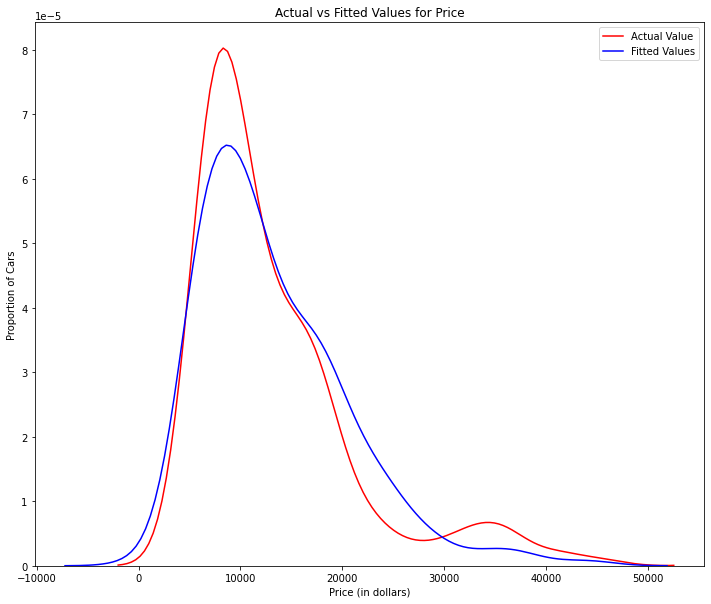

In [30]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

---

### Polynomial Regression and Pipelines : 다항 회귀

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [0]:
# fitting a polynomial model to the data
def PlotPolly(model, independent_variable, dependent_variable, Name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax = plt.gca() # 현재 axes
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf() # 현재 figure 객체
  plt.xlabel(Name)
  plt.ylabel('Price of Cars')

  plt.show()
  plt.close()


In [0]:
x = df['highway-mpg']
y = df['price']

In [33]:
# polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


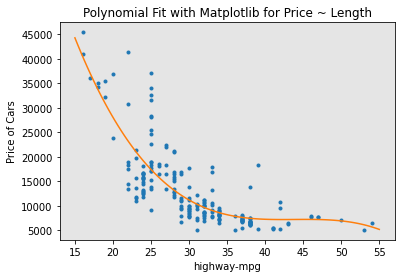

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [34]:
# plotting the function
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

#### Polynomial transform on multiple features

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# degree 2 polynomial features
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [0]:
Z_pr = pr.fit_transform(Z)

In [38]:
Z.shape # 원 데이터의 sample과 feature 갯수

(201, 4)

In [39]:
Z_pr.shape # transformation 데이터의 sample과 feature 갯수

(201, 15)

#### Pipeline
파이프라인은 data processing을 단순하게 만드는 작업을 진행한다.

[관련 blog post](https://data-newbie.tistory.com/185)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
# Standardization - Polynomial - Linear Regression 순으로 pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [42]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [43]:
pipe.fit(Z, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

---

### Measures for In-Sample Evaluation

In-Sample Evaluation 방법으로는,

- R^2 / R-squared

- Mean Squared Error(MSE) 가 있다.

#### Simple Linear Regression

In [45]:
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [46]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [0]:
from sklearn.metrics import mean_squared_error

In [48]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Multiple Linear Regression

In [49]:
# fitting the model
lm.fit(Z, df['price'])
# finding the R-square
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [0]:
Y_predict_multifit = lm.predict(Z)

In [51]:
print('The mean squared error of price and predicted value using multifit is: ',
      mean_squared_error(df['price'], Y_predict_multifit))

The mean squared error of price and predicted value using multifit is:  11980366.87072649


#### Polynomial Fit

In [0]:
from sklearn.metrics import r2_score

In [53]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [54]:
mean_squared_error(df['price'], p(x))

20474146.426361218

---

### Prediction and Decision Making

#### Prediction

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
# create a new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [57]:
# fitting the model
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# producing a prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

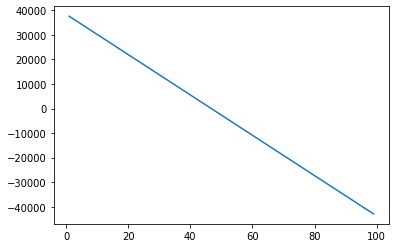

In [59]:
plt.plot(new_input, yhat)
plt.show()

#### Decision Making : Determining a Good Model Fit

- What is a good R-sqaured value?

R-square는 높을수록 data와 model의 적합도가 높다고 본다.

- What is a good MSE?

MSE은 R-square와 반대로 작을수록 적합도가 높다.

**여러 모델로 value 비교하기**

`highway-mpg`를 변수로 `price`를 예측하는 모델로 볼 때,

SLR

- R^2 : 0.4965
- MSE : 3.16 * 10^7

MLR

- R^2 : 0.8089
- MSE : 1.2 * 10^7

Polynomial Fit

- R^2 : 0.6741
- MSE : 2.05 * 10^7

=> 종합적으로 비교했을 때 해당 변수에는 MLR이 적합함